### Digital Terrain Data processing

A digital model or 3D representation of a terrain's surface created from terrain elevation data.

- A DEM (Digital Elevation Model) Represents the bare-Earth surface, removing all natural and built features;
- A DSM (Digital Surface Model) captures both the natural and built/artificial features of the environment, as shown below;
- A DTM (Digital Terrain Model)  typically augments a DEM, by including vector features of the natural terrain, such as rivers and ridges. A DTM may be interpolated to generate a DEM, but not vice versa.

More about it at [here](https://gisgeography.com/free-global-dem-data-sources/)

👉 **Download [zoo.tif](https://uca1cf07d0f32ceaba8e8ff7f719.dl.dropboxusercontent.com/cd/0/get/CpmFHJ_ZpvgszHtprT0keaPKVhKxLvL7xVGT5vHgxJGl4tdLhXc5rofoW9zckcT1QG1RAouAVRdLGc_RofzvYXYHfNSyiVU2EJ2N2sGpWWal_dicv9qI5Gli308MA2JZlybbhbMDNdfWKJpXIzsJMdwApnmNrfpY8EZwyfPVWj575A/file?_download_id=32525899375201905994115740261016197073932993587289650188573727202&_log_download_success=1&_notify_domain=www.dropbox.com&dl=1) and calculate [slope and aspect](https://stackoverflow.com/questions/47653271/calculating-aspect-slope-in-python3-x-matlab-gradientm-function) and generate a [hillshade visualization](https://matplotlib.org/gallery/specialty_plots/topographic_hillshading.html)**

In [42]:
from osgeo import gdal
import rasterio
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline 

Take a look at the DEM:

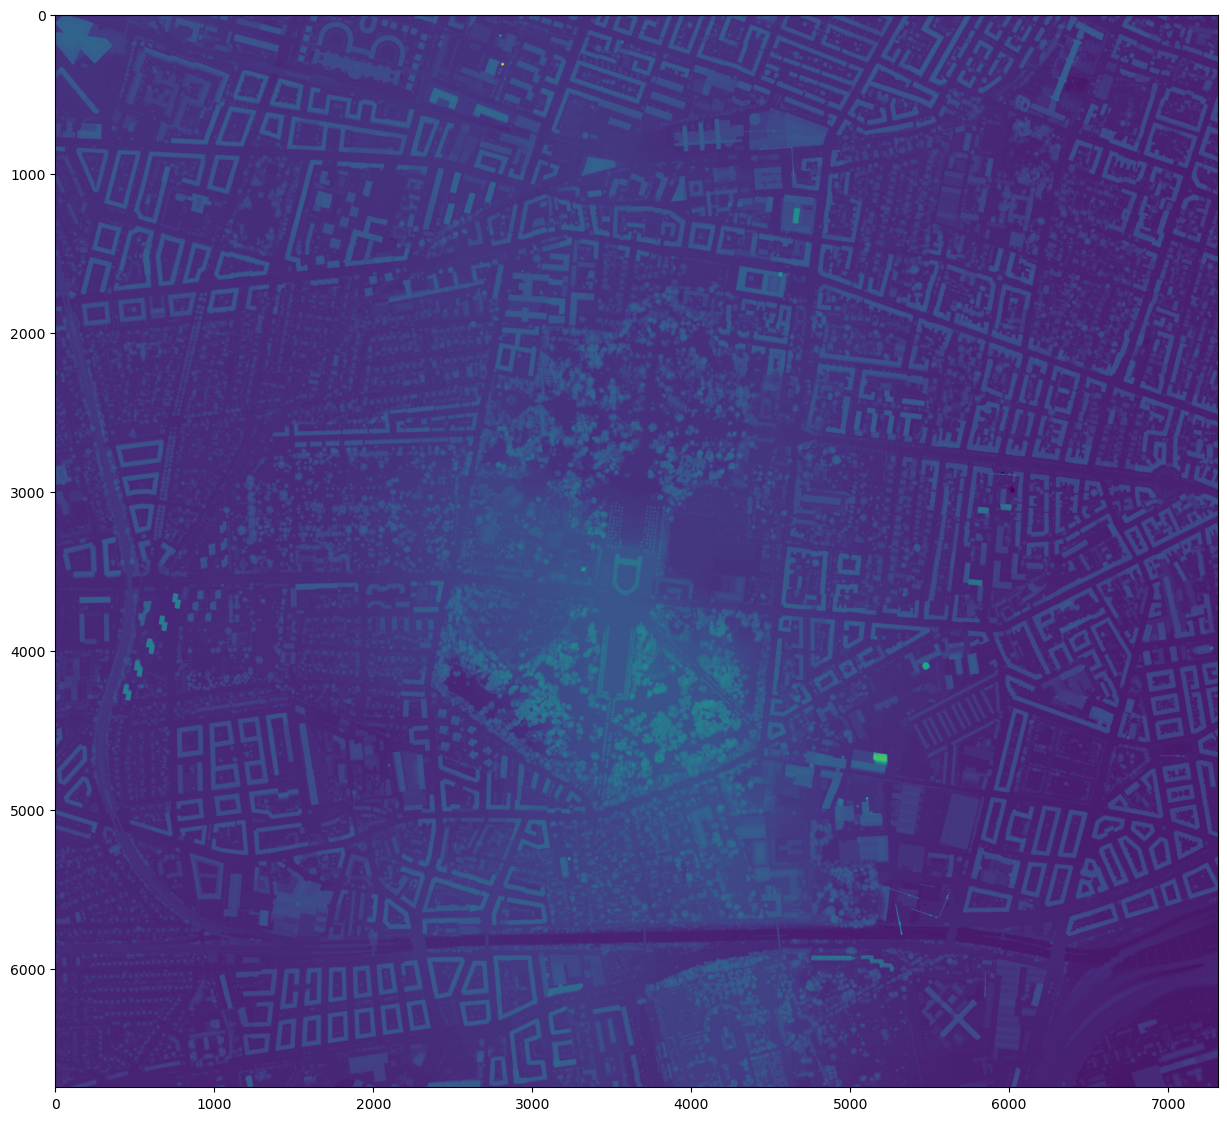

In [ ]:
with rasterio.open('zoo.tif') as dataset:
    dem=dataset.read(1)
    plt.figure(figsize=(15, 15))
    imgplot = plt.imshow(dem)

In [11]:
zo = rasterio.open('zoo.tif')

In [12]:
zo.crs

CRS.from_epsg(25832)

In [13]:
zo.count


1

In [14]:
zo.bounds

BoundingBox(left=720232.4, bottom=6173901.6, right=723157.2000000001, top=6176600.0)

In [32]:
#get rasterio dataset's width and height in pixels
raster_width = zo.width
raster_height = zo.height

'width= {}, height={}'.format(raster_width,raster_height)

'width= 7312, height=6746'

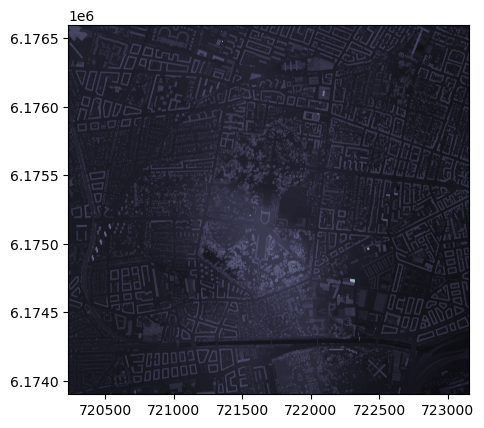

<Axes: >

In [18]:
from rasterio import plot
rasterio.plot.show(zo,cmap='bone')

In [20]:
zo_b1 = zo.read(1).astype('float64')


In [21]:
zo_b1[1,5]


12.716803550720215

we create a richdem object using rasterio band1

In [35]:
import richdem as rd

zo_dem = rd.rdarray(zo_b1, no_data=-9999)


now plot the richdem object

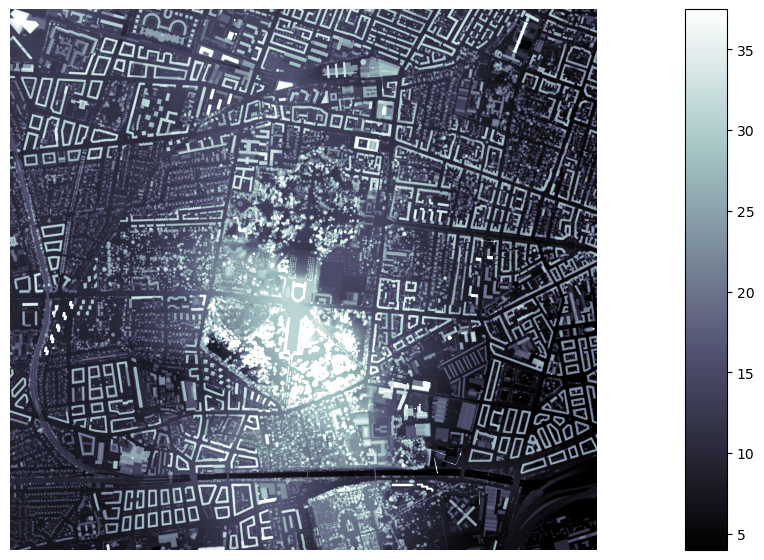

{'vmin': 3.9949686765670775, 'vmax': 37.480632629394506}

In [36]:
rd.rdShow(zo_dem, axes=False, cmap='bone', figsize=(9, 6))


In [37]:
#create slope raster using richdem

zo_slope = rd.TerrainAttribute(zo_dem, attrib='slope_degrees')


Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A Slope calculation (degrees)
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 3.29541


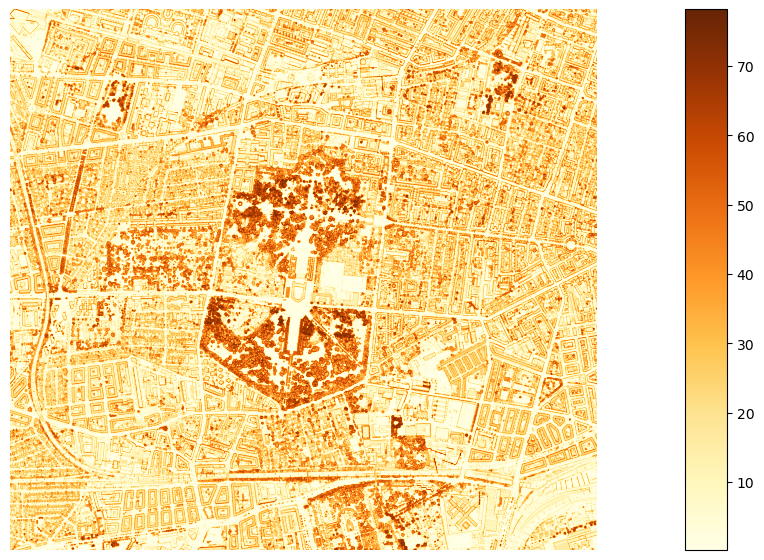

{'vmin': 0.16434526592493057, 'vmax': 78.18637832641599}

In [38]:
#plot slope values
rd.rdShow(zo_slope, axes=False, cmap='YlOrBr', figsize=(9, 6))

In [39]:
#create aspect using richdem
zo_aspect = rd.TerrainAttribute(zo_dem, attrib='aspect')

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A Aspect attribute calculation
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 3.39369


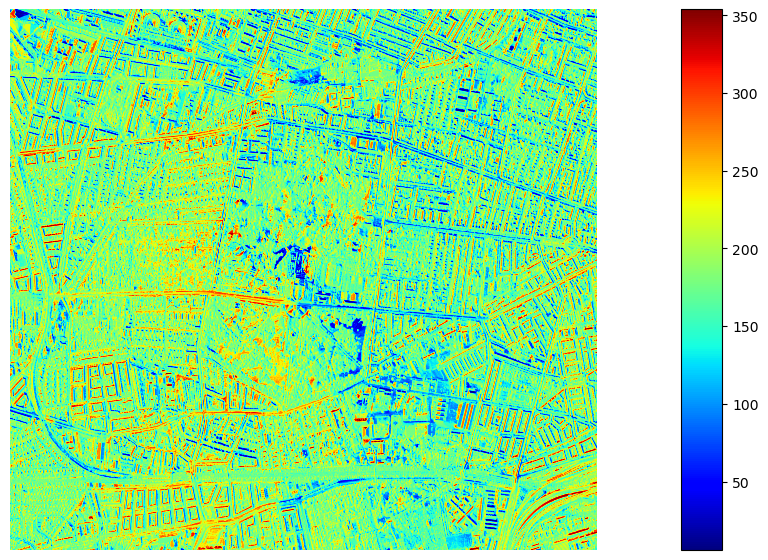

{'vmin': 5.968064413070679, 'vmax': 353.9410400390625}

In [40]:
#plot aspect values
rd.rdShow(zo_aspect, axes=False, cmap='jet', figsize=(9, 6))


The python binding for the [DEMprocessing](https://gdal.org/en/stable/programs/gdaldem.html) function in GDAL seems to be buggy, so we'll do that directly on the CLI:

In [ ]:
!gdaldem slope zoo.tif zoo_slope.tif

In [ ]:
!gdaldem aspect zoo.tif zoo_aspect.tif

In [ ]:
!gdaldem hillshade zoo.tif zoo_hillshade.tif

In [ ]:
!gdal_polygonize.py zoo_slope.tif zooo.shp 
# for vectorizing your raster, but recommend NOT to run it as it will create a massive file

In [ ]:
!gdaldem roughness zoo.tif roughness.tif

In [ ]:
for ds in ['zoo_slope.tif', 'zoo_aspect.tif', 'zoo_hillshade.tif']:
    with rasterio.open(ds) as dataset:
        dem=dataset.read(1)
        plt.figure(figsize=(15, 15))
        imgplot = plt.imshow(dem, cmap='prism') 
        # try hot, prism, gray, more at https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
madeenah_rio_ds.crs
